In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import wikipedia
import numpy as np
from tqdm import tqdm
import geopandas as gpd
import matplotlib.pyplot as plt
# req: lxml

In [2]:
def get_wiki(x,html=False):
    'get a wikipedia page from the title of an html snippet'
    if html:
        return wikipedia.WikipediaPage(x.get('title'))
    else:
        return wikipedia.page(x.get('title'))

In [17]:
def get_table(url_link):
    content = wikipedia.WikipediaPage('Indigenous_languages_of_the_Americas').html()
    soup = BeautifulSoup(content,'html.parser')
    table = soup.find_all('table', 'wikitable')

    df = pd.read_html(str(table))
    df = pd.DataFrame(df[0])
    return df, soup


df, soup = get_table(url_link="https://en.wikipedia.org/wiki/Indigenous_languages_of_the_Americas")
df = df.drop('Source',axis=1)
data = df.rename(columns={'Number of speakers':'Number'})
data = data.rename(columns={'Area(s) Language is spoken':'Areas'})

data

C:\Users\druid\AppData\Local\Temp\ipykernel_31680\4205563951.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))


,Language,Number,Official Recognition,Areas
0,Guaraní,6500000,Paraguay (Official Language) Bolivia Corriente...,"Paraguay, Bolivia, Argentina, Brazil"
1,Southern Quechua,"5,000,000 (outdated figure)[when?]",Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Argentina, Chile"
2,Nahuatl,1700000,Mexico,Mexico
3,Aymara,1700000,Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Chile"
4,Qʼeqchiʼ,1100000,Guatemala Belize Mexico,"Guatemala, Belize, Mexico"
...,...,...,...,...
238,Taíno languages,0,NaN,Formerly all of the Caribbean
239,Cochimí,0,"Mexico (Extinct, but retains recognition)",NaN
240,Kallawaya,0,"Bolivia (Extinct, but retains recognition)",NaN
241,Eyak,0,"Alaska, United States (Extinct, but retains re...",NaN


In [16]:
content = wikipedia.WikipediaPage('Indigenous_languages_of_the_Americas').html()
soup = BeautifulSoup(content,'html.parser')

In [ ]:
wikipedia.WikipediaPage('Indigenous_languages_of_the_Americas').html()

'<div class="mw-content-ltr mw-parser-output" lang="en" dir="ltr"><p class="mw-empty-elt">\n</p>\n<style data-mw-deduplicate="TemplateStyles:r1236090951">.mw-parser-output .hatnote{font-style:italic}.mw-parser-output div.hatnote{padding-left:1.6em;margin-bottom:0.5em}.mw-parser-output .hatnote i{font-style:normal}.mw-parser-output .hatnote+link+.hatnote{margin-top:-0.5em}@media print{body.ns-0 .mw-parser-output .hatnote{display:none!important}}</style><div role="note" class="hatnote navigation-not-searchable">"Amerindian language" redirects here. For the proposed language family, see <a href="/wiki/Amerind_languages" title="Amerind languages">Amerind languages</a>.</div>\n<style data-mw-deduplicate="TemplateStyles:r1305433154">.mw-parser-output .ambox{border:1px solid #a2a9b1;border-left:10px solid #36c;background-color:#fbfbfb;box-sizing:border-box}.mw-parser-output .ambox+link+.ambox,.mw-parser-output .ambox+link+style+.ambox,.mw-parser-output .ambox+link+link+.ambox,.mw-parser-outpu

In [125]:
# This all needs work

class EthnoSeries(pd.Series):
    @property
    def _constructor(self):
        return EthnoSeries
    
    @property
    def _constructor_expanddim(self):
        return EthnoDataFrame

class EthnoDataFrame(pd.DataFrame):
    @property
    def _constructor(self):
        return EthnoDataFrame
    
    @property
    def _constructor_sliced(self):
        return EthnoSeries
    
    def fix(self, column:str):
        self[column] = self[column].apply(lambda x: x.split(' ', 1)[0].replace(',',''))

def fix(data,column:str):
        data[column] = data[column].apply(lambda x: x.split(' ', 1)[0].replace(',',''))

In [126]:
mydf = EthnoDataFrame(data)

In [129]:
mydf

,Language,Number,Official Recognition,Areas
0,Guaraní,6500000,Paraguay (Official Language) Bolivia Corriente...,"Paraguay, Bolivia, Argentina, Brazil"
1,Southern Quechua,"5,000,000 (outdated figure)[when?]",Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Argentina, Chile"
2,Nahuatl,1700000,Mexico,Mexico
3,Aymara,1700000,Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Chile"
4,Qʼeqchiʼ,1100000,Guatemala Belize Mexico,"Guatemala, Belize, Mexico"
...,...,...,...,...
238,Taíno languages,0,NaN,Formerly all of the Caribbean
239,Cochimí,0,"Mexico (Extinct, but retains recognition)",NaN
240,Kallawaya,0,"Bolivia (Extinct, but retains recognition)",NaN
241,Eyak,0,"Alaska, United States (Extinct, but retains re...",NaN


In [130]:
mydf.fix('Number')

In [107]:
def other_get_table(url_link):
    content = requests.get(url_link).text
    soup = BeautifulSoup(content,'html.parser')
    table = soup.find_all('table', 'wikitable')

    df= pd.read_html(str(table))
    df=EthnoDataFrame(df[0])
    return df, soup


df,soup = other_get_table(url_link="https://en.wikipedia.org/wiki/Indigenous_languages_of_the_Americas")
df = df.drop('Source',axis=1)
data = df.rename(columns={'Number of speakers':'Number'})
data = data.rename(columns={'Area(s) Language is spoken':'Areas'})

data

C:\Users\druid\AppData\Local\Temp\ipykernel_29716\3596354091.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df= pd.read_html(str(table))


,Language,Number,Official Recognition,Areas
0,Guaraní,6500000,Paraguay (Official Language) Bolivia Corriente...,"Paraguay, Bolivia, Argentina, Brazil"
1,Southern Quechua,"5,000,000 (outdated figure)[when?]",Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Argentina, Chile"
2,Nahuatl,1700000,Mexico,Mexico
3,Aymara,1700000,Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Chile"
4,Qʼeqchiʼ,1100000,Guatemala Belize Mexico,"Guatemala, Belize, Mexico"
...,...,...,...,...
238,Taíno languages,0,NaN,Formerly all of the Caribbean
239,Cochimí,0,"Mexico (Extinct, but retains recognition)",NaN
240,Kallawaya,0,"Bolivia (Extinct, but retains recognition)",NaN
241,Eyak,0,"Alaska, United States (Extinct, but retains re...",NaN


In [108]:
data.Number = data.Number.apply(lambda x: x.split(' ', 1)[0].replace(',',''))
# Format numbers

def format_numbers(data):
    '''
    Removes zeroes, formats numbers, and turns them into strungs
    '''
    for num in data.Number:
        test = any(ele not in ['1','2','3','4','5','6','7','8','9','0'] for ele in list(num))
        if test == True:
            print(list(data.Number).index(num))
    # For now, manually rename
    data.Number[91] = '10500'

    # Remove zeros
    data = data[data.Number != '0']
    data.Number = data.Number.astype(int)

    return data

#turn into in
data = format_numbers(data)

91


C:\Users\druid\AppData\Local\Temp\ipykernel_29716\2373455483.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.Number[91] = '10500'
C:\Users\druid\AppData\Local\Temp\ipykernel_29716\2373455483.py:17: SettingWithCopyWarning: 
A value 

In [109]:
data

,Language,Number,Official Recognition,Areas
0,Guaraní,6500000,Paraguay (Official Language) Bolivia Corriente...,"Paraguay, Bolivia, Argentina, Brazil"
1,Southern Quechua,5000000,Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Argentina, Chile"
2,Nahuatl,1700000,Mexico,Mexico
3,Aymara,1700000,Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Chile"
4,Qʼeqchiʼ,1100000,Guatemala Belize Mexico,"Guatemala, Belize, Mexico"
...,...,...,...,...
231,Comanche,9,NaN,US
232,Carijona,6,"Colombia (Amazonas, Guaviare)","Colombia (Amazonas, Guaviare)"
233,Itonama,5,Bolivia,Bolivia
234,Kiliwa,4,Mexico,Mexico


In [ ]:
def format_countries(data, column:str):

    data[column].fillna('None')

    countries = ['Argentina','Bolivia','Brazil','Canada','Chile','Colombia','Costa Rica',
                'Ecuador','El Salvador','French Guiana','Guatemala','Honduras',
                'Mexico','Nicaragua','Panama','Paraguay','Peru','Suriname',
                'United States','US','Uruguay','Venezuela', 'None']

    for i in range(len(data[column])):
        temp_ct = [country for country in countries if country in data[column][i]]
        data[column][i] = temp_ct

    for i in range(len(data[column])):
        for j in range(len(data[column][i])):
            if data[column][i][j] == 'US':
                data[column][i][j] = 'United States'


format_countries(data,'Official Recognition')

C:\Users\druid\AppData\Local\Temp\ipykernel_29716\3387788669.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[column][i] = temp_ct
C:\Users\druid\AppData\Local\Temp\ipykernel_29716\3387788669.py:12: SettingWithCopyWarning: 
A value 

TypeError: argument of type 'float' is not iterable

In [112]:
data['Official Recognition'].fillna('None')

0      [Argentina, Bolivia, Brazil, Paraguay]
1           [Argentina, Bolivia, Chile, Peru]
2                                    [Mexico]
3                      [Bolivia, Chile, Peru]
4                         [Guatemala, Mexico]
                        ...                  
231                                      None
232             Colombia (Amazonas, Guaviare)
233                                   Bolivia
234                                    Mexico
235                                      None
Name: Official Recognition, Length: 236, dtype: object

In [ ]:
[ ].isem

True

In [111]:
data

,Language,Number,Official Recognition,Areas
0,Guaraní,6500000,"[Argentina, Bolivia, Brazil, Paraguay]","Paraguay, Bolivia, Argentina, Brazil"
1,Southern Quechua,5000000,"[Argentina, Bolivia, Chile, Peru]","Bolivia, Peru, Argentina, Chile"
2,Nahuatl,1700000,[Mexico],Mexico
3,Aymara,1700000,"[Bolivia, Chile, Peru]","Bolivia, Peru, Chile"
4,Qʼeqchiʼ,1100000,"[Guatemala, Mexico]","Guatemala, Belize, Mexico"
...,...,...,...,...
231,Comanche,9,NaN,US
232,Carijona,6,"Colombia (Amazonas, Guaviare)","Colombia (Amazonas, Guaviare)"
233,Itonama,5,Bolivia,Bolivia
234,Kiliwa,4,Mexico,Mexico


In [100]:
data

,Language,Number,Official Recognition,Areas
0,Guaraní,6500000,"[Argentina, Bolivia, Brazil, Paraguay]","[Argentina, Bolivia, Brazil, Paraguay]"
1,Southern Quechua,5000000,"[Argentina, Bolivia, Chile, Peru]","[Argentina, Bolivia, Chile, Peru]"
2,Nahuatl,1700000,[Mexico],[Mexico]
3,Aymara,1700000,"[Bolivia, Chile, Peru]","[Bolivia, Chile, Peru]"
4,Qʼeqchiʼ,1100000,"[Guatemala, Mexico]","[Guatemala, Mexico]"
...,...,...,...,...
231,Comanche,9,[],[United States]
232,Carijona,6,[Colombia],[Colombia]
233,Itonama,5,[Bolivia],[Bolivia]
234,Kiliwa,4,[Mexico],[Mexico]


In [94]:
for entry in data['Official Recognition']:
    if type(entry) != str:
        print(f" Entry is: '{type(entry)}'")
    else:
        pass

In [92]:
data['Official Recognition'] = data['Official Recognition'].fillna('None')
data

C:\Users\druid\AppData\Local\Temp\ipykernel_29716\1968526156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Official Recognition'] = data['Official Recognition'].fillna('None')


,Language,Number,Official Recognition,Areas
0,Guaraní,6500000,Paraguay (Official Language) Bolivia Corriente...,"[Argentina, Bolivia, Brazil, Paraguay]"
1,Southern Quechua,5000000,Bolivia (Official Language) Peru (Official Lan...,"[Argentina, Bolivia, Chile, Peru]"
2,Nahuatl,1700000,Mexico,[Mexico]
3,Aymara,1700000,Bolivia (Official Language) Peru (Official Lan...,"[Bolivia, Chile, Peru]"
4,Qʼeqchiʼ,1100000,Guatemala Belize Mexico,"[Guatemala, Mexico]"
...,...,...,...,...
231,Comanche,9,None,[United States]
232,Carijona,6,"Colombia (Amazonas, Guaviare)",[Colombia]
233,Itonama,5,Bolivia,[Bolivia]
234,Kiliwa,4,Mexico,[Mexico]


In [79]:
if type(data['Official Recognition'][0]) != str:
    print(data['Official Recognition'][0])

In [ ]:
inds = []
for i in range(len(data.Areas)):
    if data.Areas[i] == []:
        inds.append(data.Areas[i])

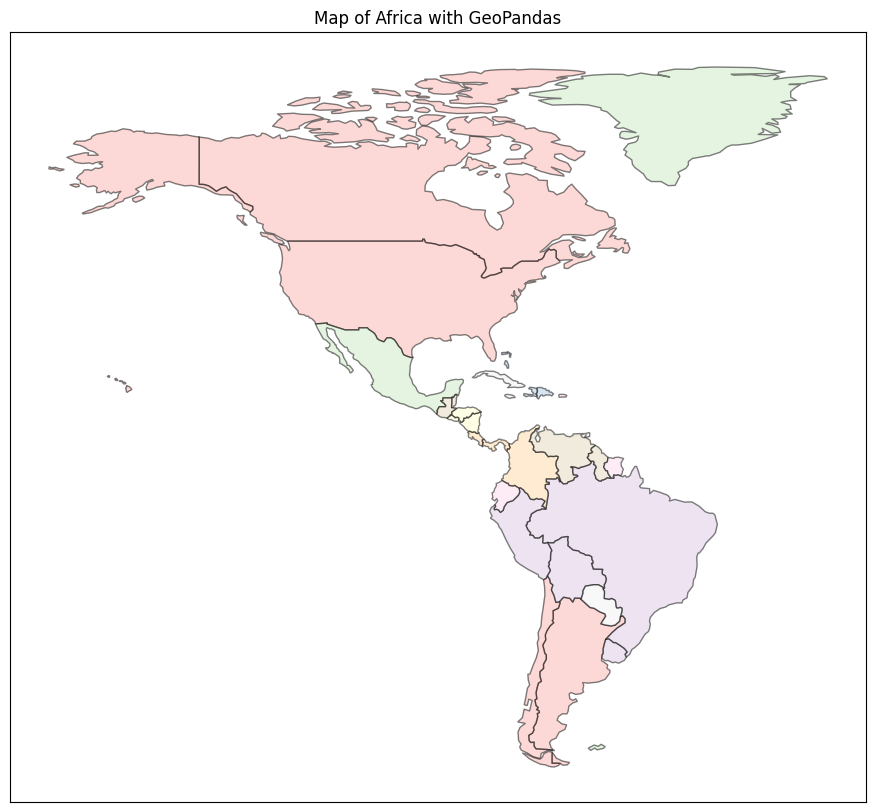

In [ ]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# grab all North American countries
n_america = world[(world["CONTINENT"] == "North America") | (world['CONTINENT'] == "South America")]

# plot a basic map of Asia
n_america.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.5,
    
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of Africa with GeoPandas")
plt.show()

In [ ]:
table = soup.find('table', 'wikitable')
links = table.findAll('a')

keep = []
for link in links: # Remove all the non titles
    if 'title' in str(link):
        keep.append(link)
links = keep

keep = []
for link in tqdm(links):
    try:
        get_wiki(link)
        keep.append(link)
    except:
        pass
links = keep

# The problem at this point is that it deletes languages.
# Maybe I oculd use some metric of the categories and use ML to find similarties in the vectors...
keep = []
for link in tqdm(links): 
    if any('Languages of' in cat for cat in get_wiki(link).categories) == True:
        keep.append(link)
links = keep

# Everything Past this Point isn't complete

 11%|█▏        | 65/567 [00:26<03:46,  2.22it/s]c:\Users\druid\anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\druid\anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
100%|██████████| 537/537 [02:55<00:00,  3.06it/s]


In [ ]:
# Get the content from the links
links_content = {}
print('Done extracting links. About to fetch: %s links..' % len(links))
for link in links:
    print('Fetching: %s' % link)
    links_content[link.get('title')] = get_wiki_html(link).html()

In [ ]:
soup = BeautifulSoup(get_wiki_html(links[0]).html(),'html.parser')
table = soup.find('table', class_='infobox vevent')
table = table.find_all('td')

In [3]:
# SToachastic for fun
# Cool idea: make a slider that shows behaviour over time
'''
We have a species that becomes pregnant for an unknown amount of time.
This species goes into cycles of ovulating or neutral state completely 
randonmly as well. These cycles are discrete and last one month.
            ovulating | pregnant | neutral
ovulating |           |          | 
pregnant  |           |          |
neutral   |           |          |
'''
preg_markov = np.array([[0.25, 0.5, 0.25],
                        [0   , 0.5, 0.5],
                        [0.5, 0  , 0.5]])
preg_0 = np.array([[0, 0, 1]])

In [4]:
def np_dot_n_times(matrix: np.array, n: int):
    i = 1
    matrix_n = matrix
    while i <= n:
        matrix_n = np.dot(matrix,matrix_n)
        i += i
    return matrix_n

def markov_process(phi_0, markov, n):
    return np.dot(phi_0,np_dot_n_times(markov,n))

In [5]:
markov_process(preg_0, preg_markov, 300)

array([[0.28569603, 0.28571701, 0.42858696]])